In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
dataset = pd.read_csv("car data.csv")
dataset.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [121]:
(dataset["Car_Name"].sort_values()).unique()

array(['800', 'Activa 3g', 'Activa 4g', 'Bajaj  ct 100',
       'Bajaj Avenger 150', 'Bajaj Avenger 150 street',
       'Bajaj Avenger 220', 'Bajaj Avenger 220 dtsi',
       'Bajaj Avenger Street 220', 'Bajaj Discover 100',
       'Bajaj Discover 125', 'Bajaj Dominar 400', 'Bajaj Pulsar  NS 200',
       'Bajaj Pulsar 135 LS', 'Bajaj Pulsar 150', 'Bajaj Pulsar 220 F',
       'Bajaj Pulsar NS 200', 'Bajaj Pulsar RS200', 'Hero  CBZ Xtreme',
       'Hero  Ignitor Disc', 'Hero Extreme', 'Hero Glamour',
       'Hero Honda CBZ extreme', 'Hero Honda Passion Pro', 'Hero Hunk',
       'Hero Passion Pro', 'Hero Passion X pro', 'Hero Splender Plus',
       'Hero Splender iSmart', 'Hero Super Splendor', 'Honda Activa 125',
       'Honda Activa 4G', 'Honda CB Hornet 160R', 'Honda CB Shine',
       'Honda CB Trigger', 'Honda CB Unicorn', 'Honda CB twister',
       'Honda CBR 150', 'Honda Dream Yuga ', 'Honda Karizma',
       'Hyosung GT250R', 'KTM 390 Duke ', 'KTM RC200', 'KTM RC390',
       'Mahindr

In [122]:
(dataset["Year"].sort_values()).unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018], dtype=int64)

In [123]:
(dataset["Fuel_Type"].sort_values()).unique()

array(['CNG', 'Diesel', 'Petrol'], dtype=object)

In [124]:
(dataset["Transmission"].sort_values()).unique()

array(['Automatic', 'Manual'], dtype=object)

In [79]:
dataset.shape

(301, 9)

In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [81]:
dataset.drop(columns=["Owner"],inplace=True)

In [82]:
dataset.drop(columns=["Selling_type"],inplace=True)

In [83]:
dataset.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Manual


In [84]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Transmission'],
      dtype='object')

In [85]:
obj_col = dataset.select_dtypes(include=["object"]).keys()

In [86]:
input_data = dataset[['Car_Name', 'Year', 'Present_Price', 'Driven_kms','Fuel_Type', 'Transmission']]

In [87]:
output_data = dataset["Selling_Price"]

In [88]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [89]:
def encoding(x,c):
    le = LabelEncoder()
    le.fit(x)
    p = le.transform(x)
    t = pd.DataFrame(p,columns=[c])
    return t

In [90]:
tu = []
for i in obj_col:
    tu.append(encoding(dataset[[i]],i))

C:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

In [91]:
tu = tuple(tu)

In [92]:
encode_data = pd.concat(tu,axis=1)

In [93]:
encode_data

,Car_Name,Fuel_Type,Transmission
0,90,2,1
1,93,1,1
2,68,2,1
3,96,2,1
4,92,1,1
...,...,...,...
296,69,1,1
297,66,2,1
298,69,2,1
299,69,1,1


In [94]:
int_data = input_data.select_dtypes(include=["int64","float64"])

In [95]:
int_data

,Year,Present_Price,Driven_kms
0,2014,5.59,27000
1,2013,9.54,43000
2,2017,9.85,6900
3,2011,4.15,5200
4,2014,6.87,42450
...,...,...,...
296,2016,11.60,33988
297,2015,5.90,60000
298,2009,11.00,87934
299,2017,12.50,9000


In [96]:
new_data = pd.concat((encode_data,int_data,output_data),axis=1)

In [97]:
new_data.head(2)

,Car_Name,Fuel_Type,Transmission,Year,Present_Price,Driven_kms,Selling_Price
0,90,2,1,2014,5.59,27000,3.35
1,93,1,1,2013,9.54,43000,4.75


C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

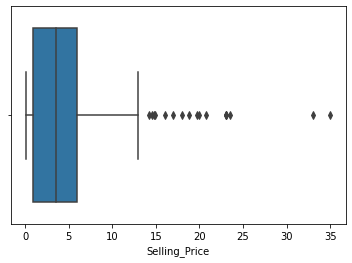

In [98]:
sns.boxplot(new_data["Selling_Price"])

In [99]:
q1 = new_data["Selling_Price"].quantile(0.25)
q3 = new_data["Selling_Price"].quantile(0.75)

In [100]:
min_data = q1-1.5*(q3-q1)
max_data = q3+1.5*(q3-q1)

In [101]:
new_data.describe()

,Car_Name,Fuel_Type,Transmission,Year,Present_Price,Driven_kms,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,62.571429,1.787375,0.867110,2013.627907,7.628472,36947.205980,4.661296
std,25.573535,0.425801,0.340021,2.891554,8.642584,38886.883882,5.082812
min,0.000000,0.000000,0.000000,2003.000000,0.320000,500.000000,0.100000
25%,47.000000,2.000000,1.000000,2012.000000,1.200000,15000.000000,0.900000
50%,69.000000,2.000000,1.000000,2014.000000,6.400000,32000.000000,3.600000
75%,82.000000,2.000000,1.000000,2016.000000,9.900000,48767.000000,6.000000
max,97.000000,2.000000,1.000000,2018.000000,92.600000,500000.000000,35.000000


In [102]:
final_dataset = new_data[new_data["Selling_Price"]<max_data]

In [103]:
final_dataset.to_csv("final_dataset.csv",index=False)

In [104]:
x = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [106]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=39)

In [107]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
knn = KNeighborsRegressor()

In [108]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
svr.fit(x_train,y_train)
rfr.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [109]:
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.8699053945808992, 0.8870271304038804)

In [110]:
dt.score(x_train,y_train),dt.score(x_test,y_test)

(1.0, 0.9599371546181779)

In [111]:
svr.score(x_train,y_train),svr.score(x_test,y_test)

(-0.06555781303353769, 0.03581598896006355)

In [112]:
rfr.score(x_train,y_train),rfr.score(x_test,y_test)

(0.9843190223982249, 0.983667833127993)

In [113]:
knn.score(x_train,y_train),knn.score(x_test,y_test)

(0.2861320793794637, -0.22580507114542403)

In [114]:
t1,t2,t3,t4,t5 = [],[],[],[],[]

In [115]:
for i in range(1,50):
    x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    dt.fit(x_train,y_train)
    svr.fit(x_train,y_train)
    rfr.fit(x_train,y_train)
    knn.fit(x_train,y_train)
    t1.append((lr.score(x_train,y_train),lr.score(x_test,y_test)))
    t2.append((dt.score(x_train,y_train),dt.score(x_test,y_test)))
    t3.append((svr.score(x_train,y_train),svr.score(x_test,y_test)))
    t4.append((rfr.score(x_train,y_train),rfr.score(x_test,y_test)))
    t5.append((knn.score(x_train,y_train),knn.score(x_test,y_test)))